In [1]:
import numpy as np

# Gestione immagini
from skimage import io # Per input/output
from skimage import filters # Per filtri locali

# Visualizzazione e interazione
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15,5] # width, height

**Immagine che useremo per questa relazione è quella di una luna [ottenuta da qui](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.phaidon.com%2Fresource%2F374-5-moon-m-light.jpg&f=1&nofb=1).**

In [2]:
image = io.imread('images/moon.jpeg', as_gray=True)

In [3]:
#We need it to see if the image size and how it will be normalized with values between 0 and 1.
print("Image Shape:",image.shape)
print("Minimun:", np.min(image), ", Maximum:", np.max(image))

Image Shape: (841, 1080)
Minimun: 0.0 , Maximum: 1.0


In [4]:
#This needs to run if values of min and max are different from 0 and 1.
image = (image - np.min(image))/np.max(image)

**Mostriamo l'immagine usata per l'assignment.**

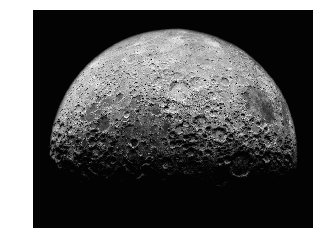

In [5]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## Definiamo le due funzioni necessarie per effettuare il gaussian mask e lo sharpening dell'immagine.

In [6]:
def gaussian_mask(image, sigma=1):
    """
    This function takes the image and the sigma for the Gaussian Filter 
    and returns the gaussian mask given by the difference between the
    image and the gaussian filtered image, this will be used by the 
    sharpened_image function
    """
    filtered = filters.gaussian(image, sigma)
    mask = image - filtered
    return mask

def shapened_image(image, sigma=1, mask_weight=1):
    """
    This sums the gaussian_mask to the original image to obtain a
    sharpended image, the sigma is passes to the gaussian mask to 
    create the mask to be summed to the image. Optionaly the mask can
    be scaled multiplying it by a number (mask_weight) it default to 1.
    """
    mask = gaussian_mask(image, sigma)
    return image + mask*mask_weight

**Qua mostriamo i risultati del filtro gaussiano (immagine blurrata e dei bordi trovati usando la funzione gaussian mask, sigma (raggio) è stato scelto = 10.**

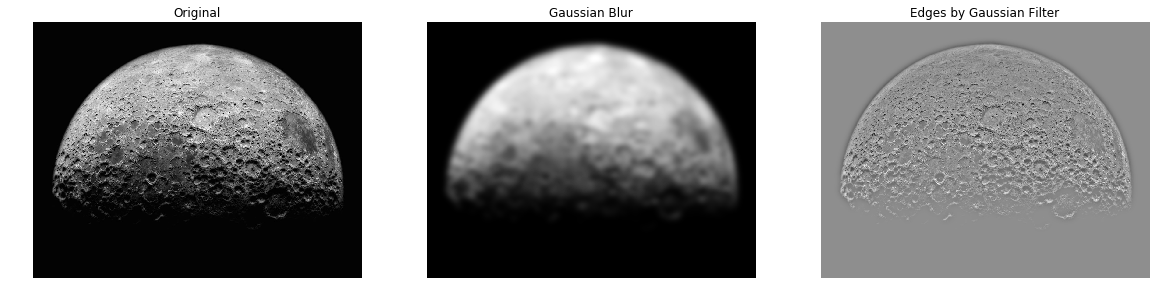

In [7]:
SIGMA = 10

plt.figure(figsize=(20,20))

plt.subplot(131)
plt.imshow(image, cmap='gray'); plt.title('Original')
plt.axis('off') 
plt.subplot(132)
plt.imshow(filters.gaussian(image, SIGMA), cmap='gray'); plt.title('Gaussian Blur')
plt.axis('off') 
plt.subplot(133)
plt.imshow(gaussian_mask(image, SIGMA), cmap='gray')
plt.title('Edges by Gaussian Filter')
plt.axis('off')

plt.show()

**Plottiamo le immagini ottenute con lo sharpening, nella prima in maniera naive plottiamo l'immagine ottenuta dalla somma del filtro con il mask, durante il plot si può vedere che tutti i colori sono stati modificati poiché sommando il mask esco fuori dalla scala 0-1 dell'immagine e rinormalizzando vengono modificati tutti i colori (anche quelli non affetti dallo sharpening), nella seconda immagine invece i valori oltre il minimo e massimo dell'immagine iniziale (0 e 1) vengono clippati ottenendo quindi un'immagine che ha mantenuto i suoi colori ed è più "sharp".**

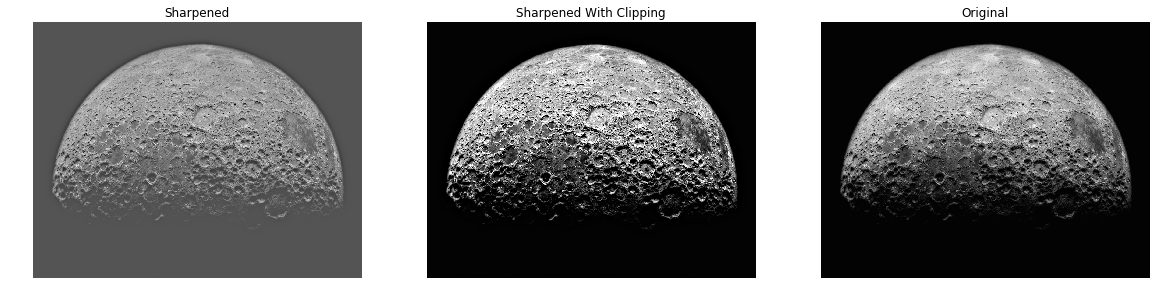

In [8]:
sharp_image = shapened_image(image, SIGMA)
sharp_image_clip = np.clip(sharp_image, np.min(image), np.max(image))


plt.figure(figsize=(20,20))

plt.subplot(131)
plt.imshow(sharp_image, cmap='gray'); plt.title('Sharpened')
plt.axis('off') 
plt.subplot(132)
plt.imshow(sharp_image_clip, cmap='gray'); plt.title('Sharpened With Clipping')
plt.axis('off')
plt.subplot(133)
plt.imshow(image, cmap='gray'); plt.title('Original')
plt.axis('off') 

plt.show()

**Un'altra funzionalità è quella di dare più peso al mask effettuando quindi una somma pesata tra l'immagine e il mask vediamo i risultati con immagini sempre clippati:**

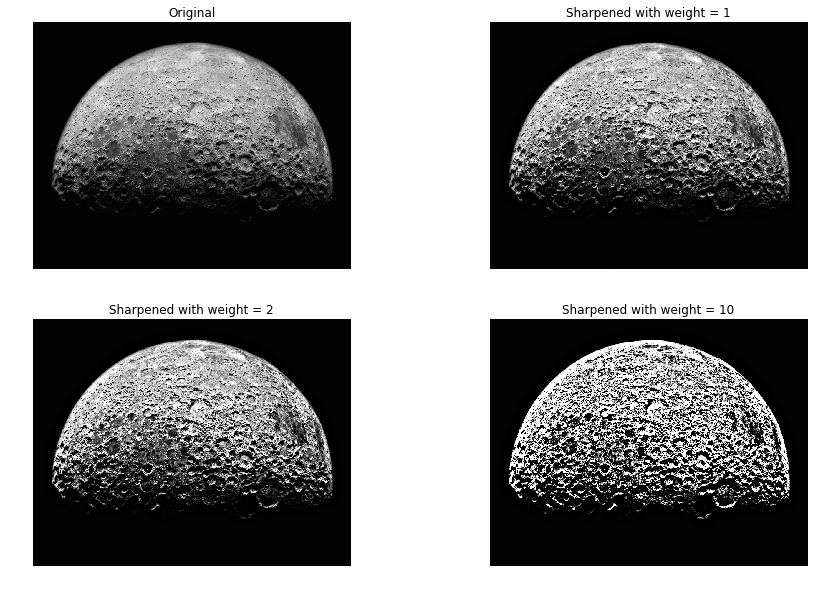

In [9]:
sharp_image_clip_0 = np.clip(shapened_image(image, SIGMA, 1), np.min(image), np.max(image))
sharp_image_clip_1 = np.clip(shapened_image(image, SIGMA, 2), np.min(image), np.max(image))
sharp_image_clip_2 = np.clip(shapened_image(image, SIGMA, 10), np.min(image), np.max(image))


plt.figure(figsize=(15,10))

plt.subplot(222)
plt.imshow(sharp_image_clip_0, cmap='gray'); plt.title('Sharpened with weight = 1')
plt.axis('off')
plt.subplot(223)
plt.imshow(sharp_image_clip_1, cmap='gray'); plt.title('Sharpened with weight = 2')
plt.axis('off') 
plt.subplot(224)
plt.imshow(sharp_image_clip_2, cmap='gray'); plt.title('Sharpened with weight = 10')
plt.axis('off')
plt.subplot(221)
plt.imshow(image, cmap='gray'); plt.title('Original')
plt.axis('off') 

plt.show()

**Si vede subito che mettendo un coefficiente più alto (peso = 2) l'immagine diventa più sharp, ma andando su un peso eccessivo (peso = 10), l'immagine visivamente consiste solo dei vari bordi formati dalla luna e cratere, questo effetto è ancora più accenuato con un altro esempio di foto:**

In [10]:
image = io.imread('images/hair.jpeg', as_gray=True)
print("Image Shape:",image.shape)
print("Minimun:", np.min(image), ", Maximum:", np.max(image))

Image Shape: (720, 1280)
Minimun: 0.0 , Maximum: 1.0


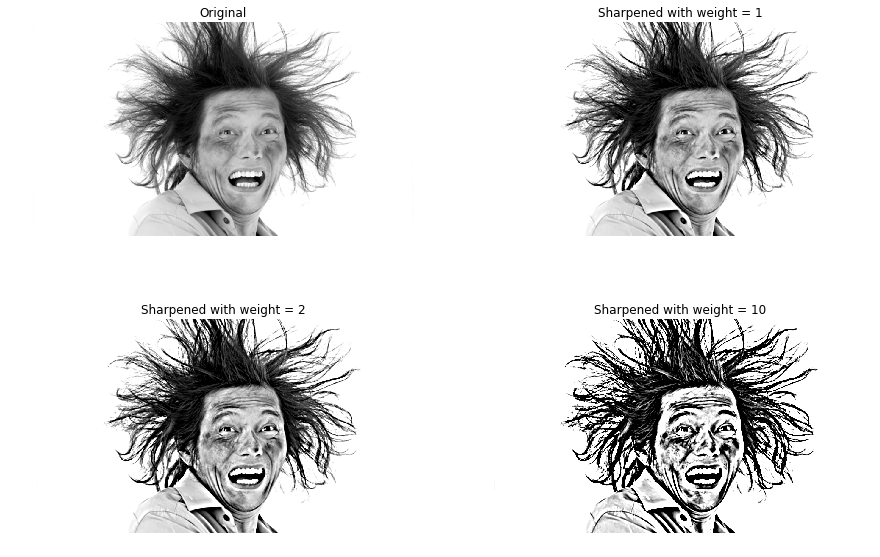

In [14]:
sharp_image_clip_0 = np.clip(shapened_image(image, SIGMA, 1), np.min(image), np.max(image))
sharp_image_clip_1 = np.clip(shapened_image(image, SIGMA, 2), np.min(image), np.max(image))
sharp_image_clip_2 = np.clip(shapened_image(image, SIGMA, 10), np.min(image), np.max(image))


plt.figure(figsize=(15,10))

plt.subplot(221)
plt.imshow(image, cmap='gray'); plt.title('Original')
plt.axis('off') 
plt.subplot(222)
plt.imshow(sharp_image_clip_0, cmap='gray'); plt.title('Sharpened with weight = 1')
plt.axis('off')
plt.subplot(223)
plt.imshow(sharp_image_clip_1, cmap='gray'); plt.title('Sharpened with weight = 2')
plt.axis('off') 
plt.subplot(224)
plt.imshow(sharp_image_clip_2, cmap='gray'); plt.title('Sharpened with weight = 10')
plt.axis('off')

plt.show()